# Raport I

## Symulacje komputerowe, MST 

Yana Negulescu, Wojciech Cybulak

08 maja, 2023

---



## Spis treści:
1. Wstęp
2. Metoda odwracania dystrybuanty
3. Metoda akceptacji odrzucenia
4. Metody generowania rozkładu normalnego
    - Metoda Boxa–Mullera 
    - Metoda biegunowa
    - Metoda akceptacji-odrzucenia przy użyciu rozkładu wykładniczego
4. Algorytm Ziggurat
5. Ułamkowy ruch Browna
    - Generowanie 100 trajektorii ułamkowego ruchu Browna z $H = 0.2 \text{i} H = 0.8$
    - Znależenie symulacyjne postaci funkcji $\mathbb{E}\tau^x$
6. Wnioski

---

## 1. Wstęp

Celem tego raportu jest omówienie i porównanie kilku metod generowania rozkładów dyskretnych i ciągłych. Opis tych metod, ich zastosowanie na różnych przykładach oraz ich poprawne przetestowanie.

Ogólnie, raport ma na celu zapewnienie wszechstronnego zrozumienia różnych metod wykorzystywanych do generowania zmiennych losowych z różnych rozkładów, umożliwiając czytelnikom wybór najbardziej odpowiedniej metody do ich konkretnego zastosowania.

---

## 2. Metoda odwracania dystrybuanty 

Metoda odwracania dystrybuanty jest prostym i skutecznym sposobem generowania liczb losowych z danego rozkładu. Polega ona na odwróceniu dystrybuanty i generowaniu liczb losowych równomiernie z zakresu od 0 do 1. Następnie do tych liczb stosowana jest funkcja odwrotna w celu uzyskania liczb losowych z rozkładu.

### **Rozkłady dyskretne**
##### *Definicja*
>Zmienną losową $X$, która przyjmuje co najwyżej przeliczelnie wiele wartości $x_1, x_2, ..., n$, nazywamy **dyskretną**.

Funkcje $p(x_i) = P(X = x_i) = p_i$ nazywamy rozkładem $X$, oraz $\sum\limits_{i}p_i = 1$.
##### *Algorytm generowania rozkładu dyskretnego*:
1. Geneguj $ U \sim \mathbb{U} (0,1)$.
2. Wyznacz $j\in \{1, 2, ..., n\}$ takie że, $$\sum\limits_{i=1}^{j-1}p_i < U \le \sum\limits_{i=1}^{j}p_i  \Longleftrightarrow F_x(x_{j-1})<U\le F_x(x_j).$$
3. Zwróć do $X = x_j$.


##### *Przykład*: Rozkład geometryczny
$X\sim \mathbb{Geom}(p)$, gdzie $0 < p < 1$</br>
$p_i = P(X = i) = p (1-p)^{i-1}$, dla $i = 1, 2, ...$



Najpierw musimy wyznaczyć $j$ takie, że $$\sum\limits_{i=1}^{j-1}p_i < U \le \sum\limits_{i=1}^{j}p_i$$
Wtedy $$\sum\limits_{i=1}^{j-1} p (1-p)^{i-1} < U \le \sum\limits_{i=1}^{j} p (1-p)^{i-1}$$
$$\cancel{p} \frac{1-(1-p)^{j-1}}{\cancel{p}} < U \le \cancel{p} \frac{1-(1-p)^{j}}{\cancel{p}}$$
$$(1-p)^j \le 1-U < (1-p)^{j-1}$$
$$j\log(1-p)\le \log(1-U) <(j-1)\log(1-p)$$
$$j-1 < \frac{\log(1-U)}{\log(1-p)} < j$$
A to znaczy, że $$j = \Biggl \lceil \frac{\log(1-U)}{\log(1-p)} \Biggr \rceil $$

Teraz **algorytm** generowania Rozkładu geometrycznego wygląda tak:
1. Generujemy $U\sim \mathbb{U}(0,1)$
2. Wstawiamy $X = \Biggl \lceil \frac{\log(U)}{\log(1-p)} \Biggr \rceil$:

In [2]:
import numpy as np
import math
import random

def Geom(p):
    U = np.random.uniform(0,1)
    X = math.ceil(np.log(U)/np.log(1-p))
    return X
    

Żeby przetestować generator, importujemy potrzebne biblioteki, wprowadzamy ilość prób $n$ oraz parametr $p$, generujemy $n$ prób.

In [3]:

import matplotlib.pyplot as plt
import scipy.stats as stats

# Generujemy n prób rozkłada z parametrem p
n = 10000
p = 0.5
data = []
for i in range (0,n):
    data.append(Geom(p))

Teraz możemy porównać **wartość oczekiwaną** naszego rozkładu z teoretyczną wartością oczekiwaną, $EX = \cfrac{1}{p}$ , to samo zrobimy i dla **warjancji**, $D^2X = \cfrac{1-p}{p^2}$ .

In [4]:
EX = np.mean(data)
VarX = np.var(data, ddof=1)

teoretyczna_EX = 1/p
teoretyczna_VarX = (1-p)/p**2

print ("EX =", EX, "; teoretyczna EX =", teoretyczna_EX)
print ("VarX =", VarX, "; teoretyczna VarX =", teoretyczna_VarX)

EX = 1.989 ; teoretyczna EX = 2.0
VarX = 2.0452835283528357 ; teoretyczna VarX = 2.0


Narysujemy wykres **gęstości** teorytycznej i empirycznej.

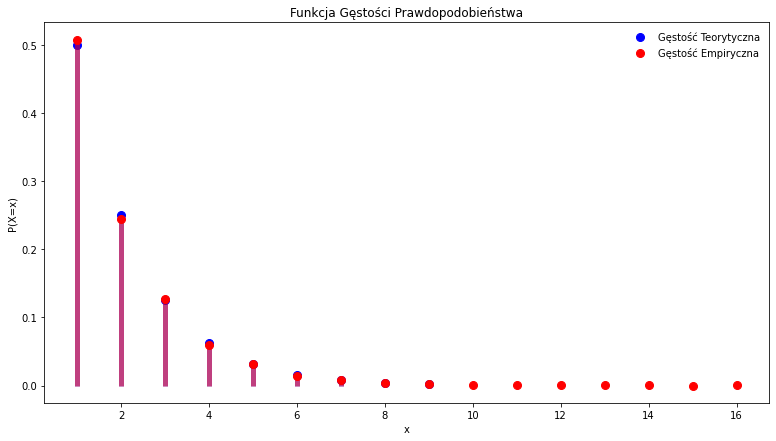

In [5]:
gestosc_teoretyczna = stats.geom(p)
x = np.arange(1,10)

counts, bin_edges = np.histogram(data, bins=max(data)-1)
emp_pmf = counts/n

plt.figure(figsize=(13,7))
plt.plot(x, gestosc_teoretyczna.pmf(x),'bo', ms=8, label='Gęstość Teorytyczna')
plt.vlines(x, 0, gestosc_teoretyczna.pmf(x), colors='b', lw=5, alpha=0.5)

plt.plot(range(1,max(data)), emp_pmf,'ro', ms=8, label='Gęstość Empiryczna')
plt.vlines(range(1,max(data)), 0, emp_pmf, colors='r', lw=5, alpha=0.5)

plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.title('Funkcja Gęstości Prawdopodobieństwa')
plt.legend(loc='best', frameon=False)

Wykres **dystrybuanty** teoretycznej i empirycznej:

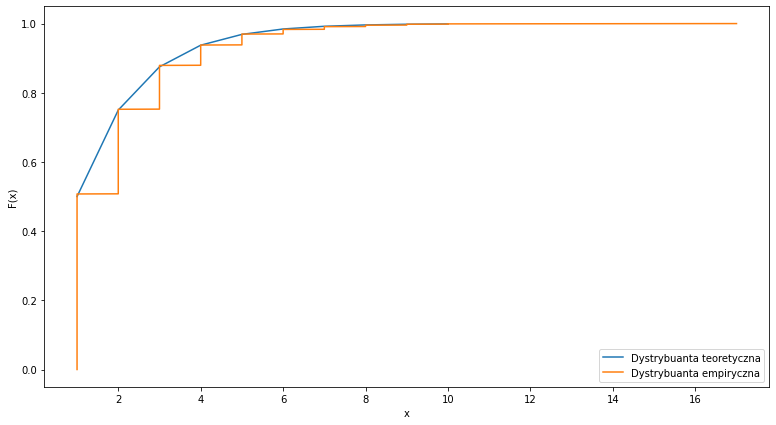

In [6]:
from statsmodels.distributions.empirical_distribution import ECDF

def F(x):
    return 1-(1-p)**x

x = []
for i in range (1,11):
    x.append(i)
y = [F(i) for i in x]


dystrybemp=ECDF(data)

plt.figure(figsize=(13,7))
plt.plot(x, y, label="Dystrybuanta teoretyczna")
plt.plot(dystrybemp.x, dystrybemp.y, label="Dystrybuanta empiryczna")
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()

**QQ-plot:**

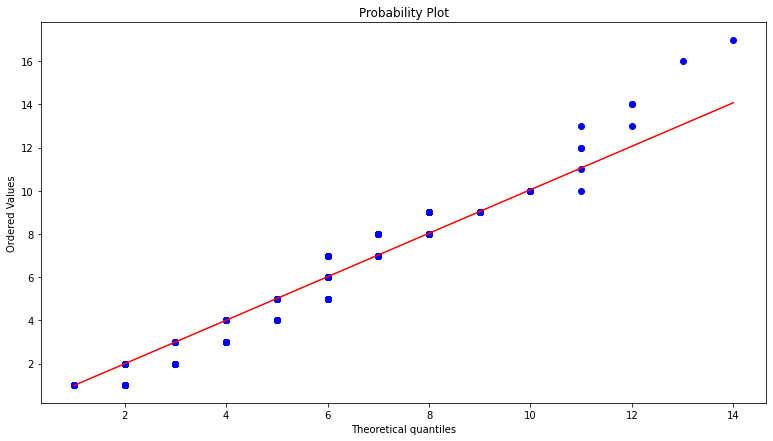

In [7]:
plt.figure(figsize=(13,7))
stats.probplot(data, dist=stats.geom(p), plot=plt)
plt.show()

##### *Wnioski:*
Po przetestowaniu narzego generatora rozkładu geometrycznego metodą odwracania dystrybuanty, możemy stwierdzić że poprawnie wygenerowaliśmy rozkład geometryczny przy użyciu metody odwrotnej dystrybuanty i przetestowaliśmy go w odniesieniu do teoretycznych wartości rozkładu. Korzystając z odwrotności dystrybuanty, byliśmy w stanie wygenerować sekwencję liczb losowych, które są zgodne z pożądanym rozkładem.

### **Rozkłady ciągłe**
##### *Definicja*
>Zmienną losową $X$, ma rozkład **ciągły**, jeśli istnieje całkowita funkcja $f:\mathbb{R} \rightarrow \mathbb{R}_+$ taka, że $f$ nazywamy gęstością prawdopodobieństwa zmiennej losowej $X$.

Założmy, że $U\sim \mathbb{U} (0,1)$, oraz $X$ ma ściśle rosnącą dystrybuantę $F_x$. Zdefiniujemy $Y = F_x^{-1} (U)$. Wtedy $Y = X$.

##### *Algorytm generowania rozkładu ciągłego*:
1. Wyznacz $F_x^{-1}$
2. Generuj $U\sim \mathbb{U}(0,1)$
3. Wstaw $X = F_x^{-1}(U)$

##### *Przykład:* Rozkład Laplace'a

$X\sim \mathbb{L}(m,\lambda)$, $\quad$ gdzie $m \in \mathbb{R}$ i $\lambda > 0$

$f(x) = \cfrac{1}{2\lambda} \exp{\biggl(-\cfrac{|x-m|}{\lambda}\biggr)}$

$F_x(x) = 
 \begin{cases}
   \cfrac{1}{2} \exp\biggl(\cfrac{x-m}{\lambda}\biggr), \qquad\qquad \text{dla} \quad x\le m\\
   1 - \cfrac{1}{2} \exp\biggl(-\cfrac{x-m}{\lambda}\biggr), \qquad \text{dla} \quad x\geq m
 \end{cases}$

Żeby wygenerować rozkład Laplace'a najpierw musimy wyznaczyć **$F_x^{-1}(x)$**:

Niech $F_x(x) = y$
1. Dla $x\le m$:
$$\cfrac{1}{2} \exp\biggl(\cfrac{x-m}{\lambda}\biggr) = y$$
$$ \exp\biggl(\cfrac{x-m}{\lambda}\biggr) = 2y$$
$$ \log{2y} = \cfrac{x-m}{\lambda}$$
$$ x = \lambda \log{2y}+m$$
$\quad$ Z tego możemy powiedzieć, że 
$$F_X^{-1}(x) = \lambda \log{2x}+m$$

2. Dla $x\geq m$:
$$1 - \cfrac{1}{2} \exp\biggl(-\cfrac{x-m}{\lambda}\biggr) = y$$
$$ \exp\biggl(-\cfrac{x-m}{\lambda}\biggr) = -2y+2$$
$$ \log{(-2y + 2)} = -\cfrac{x-m}{\lambda}$$
$$ x = -\lambda \log{(-2y + 2)}+m$$
$\quad$ Z tego możemy powiedzieć, że 
$$F_X^{-1}(x) = -\lambda \log{(-2x + 2)}+m$$

Wtedy **odwrotna dystrybuanta** rozkładu Laplace'a wygląda tak:
$$F_x^{-1}(x) = 
 \begin{cases}
   \lambda \log{2x}+m, \qquad\qquad\qquad \text{dla} \quad x\le m\\
   -\lambda \log{(-2x + 2)}+m, \qquad \text{dla} \quad x\geq m
 \end{cases}$$

 **Algorytm** generowania Rozkłada Laplace'a:
 1. Generuj $U\sim \mathbb{U}(0,1)$
 2. Wstaw 
 X = $F_x^{-1}(U) = 
 \begin{cases}
   \lambda \log{2U}+m, \qquad\qquad\qquad \text{dla} \quad U\le m\\
   -\lambda \log{(-2U + 2)}+m, \qquad \text{dla} \quad U\geq m
 \end{cases}$



In [8]:
def rozklad_Laplacea(m, lamda):
    U = np.random.uniform(0,1)
    if U <= m:
        X = lamda*np.log(2*U) + m
    else:
        X = -lamda*np.log(-2*U + 2) + m
    return X

Przetestujemy otrzymany generator - wprowadzamy ilość prób $n$ i parametry $m$ i $\lambda$, oraz generujemy $n$ prób:

In [9]:
#Generujemy n prób rozkłada z parametrem p
n = 10000
m = 0.5
lamda = 1
data = []
for i in range (0,n):
    data.append(rozklad_Laplacea(m, lamda))

Porównujemy **wartość oczekiwaną** naszego rozkładu z teoretycznej wartością oczekiwanej, która wynosi $EX = m$, to samo zrobimy i dla **warjancji**, $D^2X = 2\lambda^2$.



In [10]:
EX = np.mean(data)
VarX = np.var(data, ddof=1)

teoretyczna_EX = m
teoretyczna_VarX = 2*lamda**2

print ("EX =", EX, "; teoretyczna EX =", teoretyczna_EX)
print ("VarX =", VarX, "; teoretyczna VarX =", teoretyczna_VarX)

EX = 0.506152660877089 ; teoretyczna EX = 0.5
VarX = 1.9401204011966526 ; teoretyczna VarX = 2


Teraz narysujemy **histogram** oraz **gęstość** rozkładu:

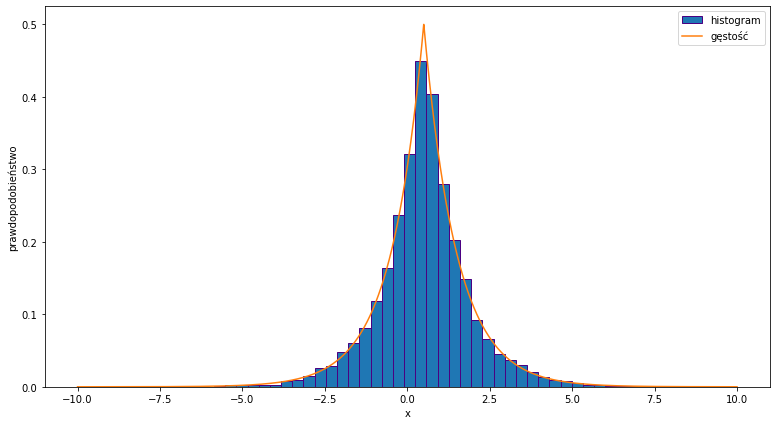

In [11]:
x = np.linspace(-10, 10, 10000)
f_x = np.exp(-abs(x-m)/lamda)/(2*lamda)

plt.figure(figsize=(13,7))
plt.hist(data, bins = 50, edgecolor = 'indigo', density = True, label='histogram')
plt.plot(x, f_x, label = 'gęstość')
plt.xlabel('x')
plt.ylabel('prawdopodobieństwo')
plt.legend()

Narysujemy **dystrybuantę** teoretyczną oraz empiryczną:

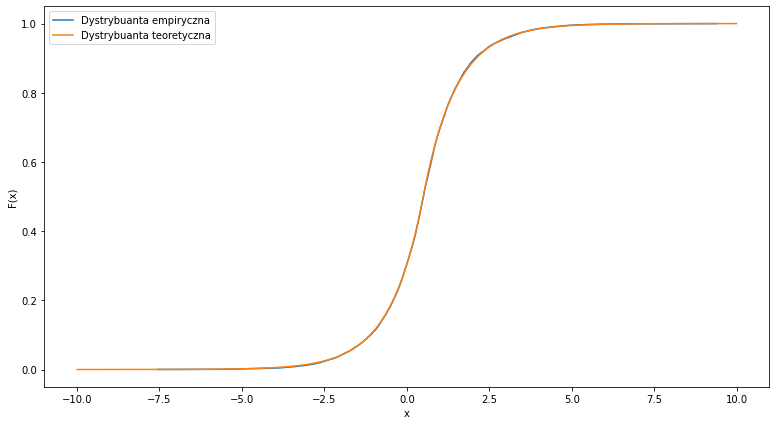

In [12]:
def F(x):
       if x<= m:
              return np.exp((x-m)/lamda)/2
       else:
              return 1 - np.exp(-(x-m)/lamda)/2
       
y = [F(i) for i in x]
dystrybemp=ECDF(data)

plt.figure(figsize=(13,7))
plt.plot(dystrybemp.x, dystrybemp.y, label="Dystrybuanta empiryczna")
plt.plot(x, y, label="Dystrybuanta teoretyczna")
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()

**QQ-plot**:

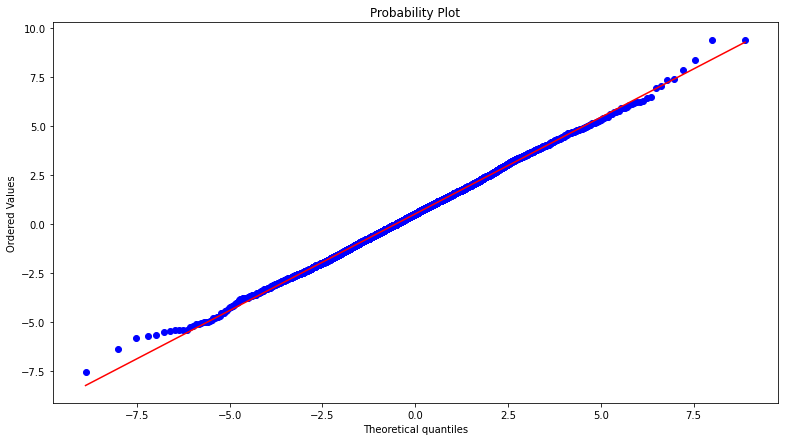

In [13]:
plt.figure(figsize=(13,7))
stats.probplot(data, dist=stats.laplace, plot=plt)
plt.show()

##### *Wnioski:*

Po przetestowaniu naszego generatora możemy stwierdzić że dane empiryczne ściśle odpowiadają wartościom teoretycznym, co wskazuje, że metoda zastosowana do wygenerowania danych była poprawna.

---

## 3. Metoda akceptacji-odrzucenia

Metoda akceptacji-odrzucenia jest uniwersalną metodą generowania liczb losowych z dowolnego rozkładu. Polega na generowaniu liczb losowych z rozkładu, z którego można łatwo pobrać próbkę, a następnie odrzucaniu tych prób, które nie mieszczą się w pożądanym rozkładzie. 

### **Rozkłady dyskretne**

##### *Cel:*
Chcemy wygenerować $X$ o rozkładzie dyskretnym $p_i = P(X = i), \; i = 1,2 ...,\; \sum\limits_{i}p_i = 1$

##### *Założenia:*
1. Potrafimy generować realizację innej zmiennej losowej $Y$ o rozkładzie $q_i = P(Y = i), \; i = 1,2,..., \; \sum\limits_{i}p_i = 1$. Zbiory wartości $X$ i $Y$ muszą być takie same.
2. Istnieje taka stała $0<c<\infty$. Taka że $\max{\cfrac{p_i}{q_i}}\le c$

##### *Algorytm generowania rozkładu dyskretnego*:
1. Geneguj $Y$
2. Generuj $U\sim\mathbb{U}(0,1), \; U\perp Y$
3. Jeśli $U\le\cfrac{p_Y}{c\cdot q_Y}$ zwróć $X=Y$, w przeciwnym razie wróć do 1.

Powyższy algortm generuje realizacje zmiennej losowej $X$ o rozkładzie $p_i = P(X = i)$

##### *Przykład:* Rozkład Dwumianowy

$X\sim \mathbb{Bin}(n,p)$, \; gdzie $0 < p < 1$ oraz $n\in \N_{+} $ </br>
$x_k = k,\; p_i = P(X = i) = {n\choose k}(p^k)(1-p)^{n-k}$, dla $i = 1, 2, ...$ , oraz $k = 0,1,2,...,n$

Używamy rozkład jednostajny, jako rozkład pomozniczy. Wtedy **algorytm** generowania rozkładu dwumianowego wygląda tak:

1. Generuj $Y\sim\mathbb{DU}(q)$
2. Generuj $U\sim\mathbb{U}(0,1), \; U\perp Y$
3. Jeśli $U\le\cfrac{p_Y}{c\cdot q_Y}$ zwróć $X=Y$, w przeciwnym razie wróć do 1.

Skorzystamy z tego algorytmu. Wygenerujemy rozkład pomocniczy:

In [14]:
def jednostajny(q):
    u = np.random.uniform(0,1)
    prob = []
    for a in range(q):
        prob.append(1/q)
    k = 0
    i = 0
    suma1 = 0
    suma2 = prob[0]
    while k == 0:
        for j in range(1, q):
            if u > (1-(1/q)):
                i = q
                k = 1
            if suma1 < u <= suma2:
                i = j
                k = 1
            suma1 = suma1 + prob[j - 1]
            suma2 = suma2 + prob[j]
    return i

Wyznaczamy **stałą $c$**:

In [15]:
def fun_c(tab,n):
    c = -np.inf
    for i in range(n-1):
        if tab[i]/(1/n) > c:
            c = tab[i]/(1/n)
    return c

Generujemy realizację zmiennej losowej $X$ z rozkładu dwumianowego:

In [16]:
from scipy.special import comb

def rozklad_dwumianowy(n,p):
    q = 1-p
    tab = []
    for i in range(n):
        tab.append(np.array(comb(n,i)*(p**i)*(q**(n-i))))
    z = 0
    x = 0
    while z==0:
        y = jednostajny(n)
        u = np.random.uniform(0,1)
        if u<=(tab[y-1]/fun_c(tab,n)*(1/n)):
            x = y
            z = 1
    return x

Żeby przetestować generator, wprowadzamy ilość prób $N$ oraz parametry $p,\;n$, generujemy $N$ prób.

In [17]:
N = 1000
n = 10
p = 0.5
data = stats.binom.rvs(n, p, size=N)

Teraz możemy porównać **wartość oczekiwaną** naszego rozkładu z teoretyczną wartością oczekiwaną, $EX = np$ , to samo zrobimy i dla **warjancji**, $D^2X = np(1-p)$ .

In [18]:
EX = np.mean(data)
VarX = np.var(data, ddof=1)

teoretyczna_EX = n*p
teoretyczna_VarX = (1-p)*n*p

print ("EX =", EX, "; teoretyczna EX =", teoretyczna_EX)
print ("VarX =", VarX, "; teoretyczna VarX =", teoretyczna_VarX)

EX = 5.023 ; teoretyczna EX = 5.0
VarX = 2.545016016016016 ; teoretyczna VarX = 2.5


Narysujemy wykres **gęstości** teorytycznej i empirycznej.

Text(0.5, 1.0, 'Rozkład prawdopodobieństw')

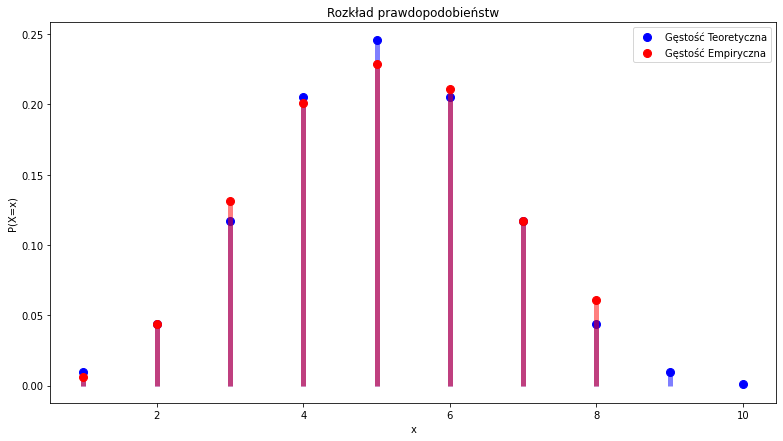

In [19]:
x = np.arange(0, n+1)

counts, bin_edges = np.histogram(data, bins=max(data)-1)
emp_pmf = counts/N

plt.figure(figsize=(13,7))
plt.plot(x[1:], stats.binom.pmf(x[1:], n, p),'bo', ms=8, label='Gęstość Teoretyczna')
plt.vlines(x[1:], 0, stats.binom.pmf(x[1:], n, p), colors='b', lw=5, alpha=0.5)

plt.plot(range(1,max(data)), emp_pmf,'ro', ms=8, label='Gęstość Empiryczna')
plt.vlines(range(1,max(data)), 0, emp_pmf, colors='r', lw=5, alpha=0.5)

plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.legend()
plt.title('Rozkład prawdopodobieństw')

Wykres **dystrybuanty** teoretycznej i empirycznej:


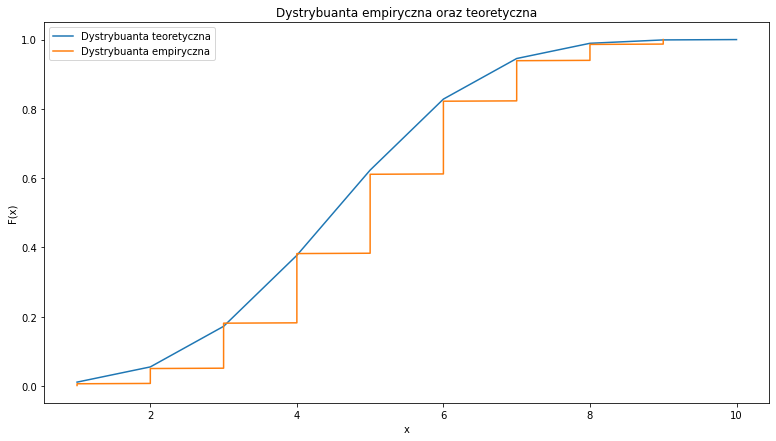

In [20]:
from scipy.stats import binom
from statsmodels.distributions.empirical_distribution import ECDF

def F(k,n,p):
    return binom.cdf(k, n, p, loc=0)

x = list(range(1, n+1))
y = [F(k, n, p) for k in x]

dystrybemp = ECDF(data)

plt.figure(figsize=(13,7))
plt.plot(x, y, label="Dystrybuanta teoretyczna")
plt.plot(dystrybemp.x, dystrybemp.y, label="Dystrybuanta empiryczna")
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Dystrybuanta empiryczna oraz teoretyczna')
plt.legend()

**QQ-plot:**


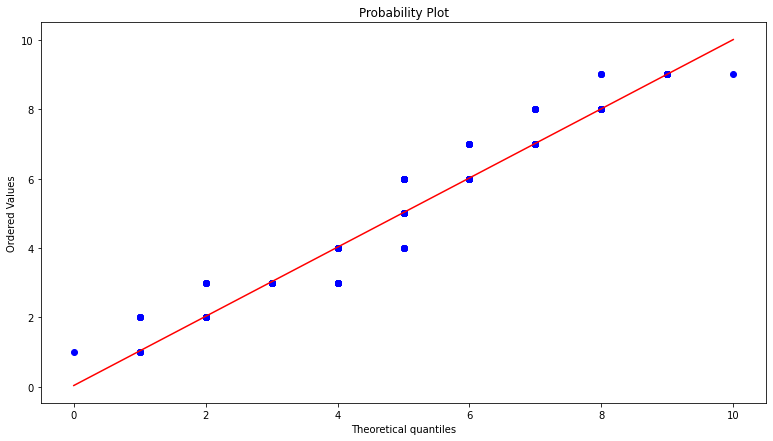

In [21]:
plt.figure(figsize=(13,7))
stats.probplot(data, dist=binom(n, p), plot=plt)
plt.show()

##### *Wnioski:*

Z wyników naszych testów możemy powiedzieć, że wygenerowane próbki są generalnie zgodne z teoretycznymi wartościami rozkładu dwumianowego, chociaż w niektórych przypadkach zaobserwowana jest rozbieżność wartości emirycznych oraz teoretycznych. Może to wynikać z niezaprzeczonej losowości generowania liczb losowych lub z błędów w implementacji algorytmu.

### **Rozkłady ciągłe**

$X$ jest zmienną losową o gęstości $f_X(x)$. Zakładamy że $f$ jest ciągła i przyjmuje dodatnie wartości.

##### *Cel:*
Chcemy generować zmienną losową $X$ o gęstości $f(x)$.

##### *Założenia:*
1. Potrafimy generować inną zmienną losową $Y$ o gęstości $g(x)$. $X$ i $Y$ muszą przymować wartości z tego samego zbioru.
2. Potrafimy wyznaczyć stałą $c$ taką, że $\; \sup{\biggl(\cfrac{f(x)}{g(x)}\biggr)}\le c<\infty$

##### *Algorytm generowania rozkładu ciągłego metodą akceptacji-odrzucenia:*
1. Generujemy $Y$
2. Generujemy $U\sim\mathbb{U}(0,1)$, $U\perp Y$
3. Jeśli $U\le\cfrac{f(x)}{g(x)}$ zwróć $X = Y$. W przeciwnym razie wróć do 1.

Powyższy algorytm generuje zmienną losową $X$ o gęstości $f(x)$.

##### *Przykład:* Rozkład Wejbulla

$X\sim \mathbb{W}(\lambda,k)$, $\quad$ gdzie $\lambda > 0$ i $k>0$

Funkcja gęstości rozkładu:
$f(x) = 
 \begin{cases}
   0, \qquad\qquad\qquad\qquad\;\; \text{dla} \quad x\le 0\\
   \cfrac{k}{\lambda}\;\cdot\biggl(\cfrac{x}{\lambda}\biggr)^{k-1}\exp{\biggl(-\biggl(\cfrac{x}{\lambda}\biggr)^k\biggr)}, \qquad \text{dla} \quad x>0
 \end{cases}$

Dystrybuanta tego rozkładu:
$F_x(x) = 
 \begin{cases}
   0, \qquad\qquad\qquad \text{dla} \quad x\le 0\\
   1-\exp{\biggl(-\biggl(\cfrac{x}{\lambda}\biggr)^k\biggr)}, \qquad \text{dla} \quad x>0
 \end{cases}$

 Używamy rozkład wykładniczy o gęstości $g(x) = \lambda e^{-\lambda x}$ jako rozkład pomocniczy. Wtedy **algorytm** generowania Rozkłada Wejbulla wygląda tak:
 1. Generuj $Y\sim\mathbb{Exp}(1)$
 2. Generuj $U\sim\mathbb{U}(0,1)$, $U\perp Y$
 3. Jeśli $U\le\cfrac{f(x)}{g(x)}$ zwróć $X = Y$. W przeciwnym razie wróć do 1.

Żeby skożystać z algorytmu najpierw zaimplementujemy funkcje gęstości rozkładów Weibulla i Wykładniczego:

In [22]:
def c_function(lam,k):
    x = np.arange(0, 1000, 0.1)
    f = (k / lam) * (x / lam)**(k - 1) * np.e**(-(x / lam)** k)
    g = lam*np.e**(-lam*x)+ np.finfo(float).eps
    c = np.max(f/g)
    return c

def f_function(lam,k,x):
    f = 0
    if x>0:
        f = (k / lam) * (x / lam)**(k - 1) * np.e**(-(x / lam)** k)
    return f

def g_function(lam,x):
    g = lam*np.e**(-lam*x)
    return g


Zajmplementujemy funkcję generującą zmienną losową z rozkładu wykładniczego kożystając z metody odwrotnej dystrybuanty:

In [23]:
def exponential(lam):
    u = np.random.uniform(0,1)
    x = -np.log(1-u)/lam
    return x

Teraz kożystając z **algorytmu** implementujemy funkcję generowania rozkładu Weibulla:

In [24]:
def rozklad_Weibulla(lam, k):
    
    while True:
        y = exponential(lam)
        u = np.random.random()
        if( u <= f_function(lam,k,y)/((c_function(lam,k))*g_function(lam,y))):
            x = y
            return x

Przetestujemy otrzymany generator - wprowadzamy ilość prób $n$ oraz parametry $\lambda$ i $k$, generujemy $n$ prób:

In [25]:
#Generujemy n prób rozkłada z parametrem p
n = 1000
k = 1
lam = 1
data = []
for i in range (0,n):
    data.append(rozklad_Weibulla(lam, k))

Porównujemy **wartość oczekiwaną** naszego rozkładu z teoretycznej wartością oczekiwanej, która wynosi $EX = \lambda \Gamma\biggl(1+\cfrac{1}{k}\biggr)$, to samo zrobimy i dla **warjancji**, $D^2X = \lambda^2\cdot\Gamma\biggl(1+\cfrac{2}{k}\biggr)-\Gamma\biggl(q+\cfrac{1}{k}\biggr)^2$.


In [26]:
from scipy.special import gamma

EX = np.mean(data)
VarX = np.var(data, ddof=1)

teoretyczna_EX = lam*gamma(1 + 1/k)
teoretyczna_VarX = lam**2 * (gamma(1 + 2/k) - gamma(1 + 1/k)**2)

print ("EX =", EX, "; teoretyczna EX =", teoretyczna_EX)
print ("VarX =", VarX, "; teoretyczna VarX =", teoretyczna_VarX)

EX = 0.9992054948285948 ; teoretyczna EX = 1.0
VarX = 1.0712970668703636 ; teoretyczna VarX = 1.0


Teraz narysujemy **histogram** oraz **gęstość** rozkładu:

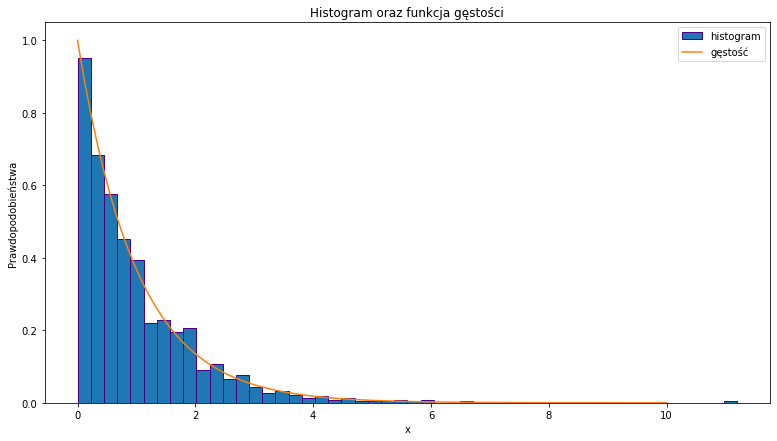

In [27]:
x = np.linspace(0, 10, 10000)
f_x = (k / lam) * (x / lam)**(k - 1) * np.e**(-(x / lam)** k)

plt.figure(figsize=(13,7))
plt.hist(data, bins = 50, edgecolor = 'indigo', density = True, label='histogram')
plt.plot(x, f_x, label = 'gęstość')
plt.xlabel('x')
plt.ylabel('Prawdopodobieństwa')
plt.title('Histogram oraz funkcja gęstości')
plt.legend()

Narysujemy **dystrybuantę** teoretyczną oraz empiryczną:

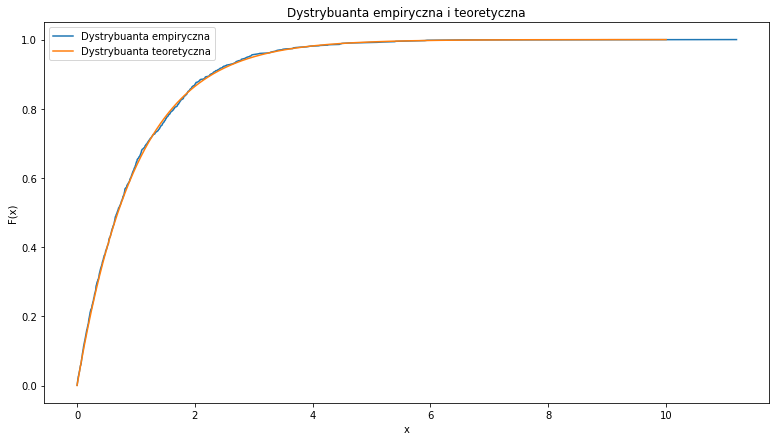

In [28]:
def F(x):
    return 1 - (np.e**(-((x/lam)**k)))
       
y = [F(i) for i in x]
dystrybemp=ECDF(data)

plt.figure(figsize=(13,7))
plt.plot(dystrybemp.x, dystrybemp.y, label="Dystrybuanta empiryczna")
plt.plot(x, y, label="Dystrybuanta teoretyczna")
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Dystrybuanta empiryczna i teoretyczna')
plt.legend()

**QQ-plot:**

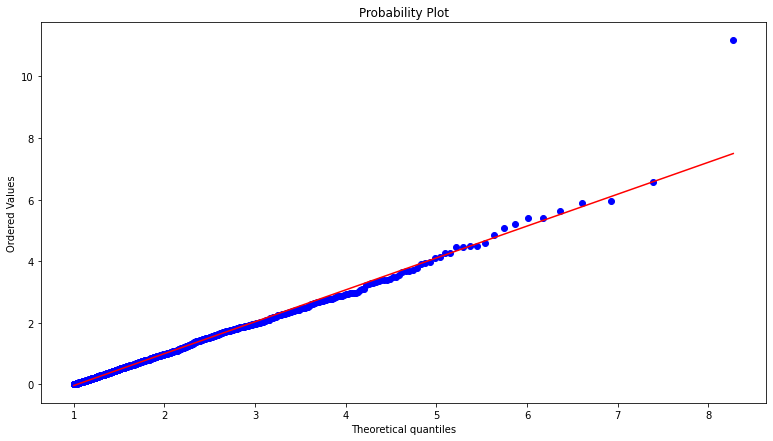

In [29]:
plt.figure(figsize=(13,7))
stats.probplot(data, dist=stats.weibull_min(lam,k), plot=plt)
plt.show()

##### *Wnioski*
Wyniki testów pokazały, że średnia empiryczna i wariancja były zbliżone do wartości teoretycznych, co wskazuje, że metoda akceptacji-odrzucenia była prawidłową metodą generowania liczb losowych z rozkładu Weibulla. Narysowaliśmy histogram wygenerowanych próbek i porównaliśmy go z funkcją gęstości prawdopodobieństwa rozkładu Laplace'a. Wykres pokazał, że wygenerowane próbki odpowiadały funkcji gęstości prawdopodobieństwa, oraz na wykresie dystrybuanty dystrybuanta empiryczna i teoretyczna so ścisle blizko siebie.

---

## 4. Metody generowania rozkładu normalnego

##### *Definicja*

**Rozkład normalny** może być jednoznacznie zdefiniowany poprzez:

- funkcję gęstości prawdopodobieństwa
- dystrybuantę
- funkcję charakterystyczną
- momenty (funkcję tworzącą momenty)
- kumulanty (funkcję tworzącą kumulanty)

> Zmienna losowa $X$ ma rozkład $N(\mu,\sigma)$, jeżeli jej funkcja gęstości prawdopodobieństwa $f_{\mu\sigma}(x)$ wyrażona jest wzorem: $$f_{\mu\sigma}(x) = \cfrac{1}{\sigma\sqrt{2\pi}}\exp\biggl(\cfrac{-(x-\mu)^2}{2\sigma^2}\biggr)$$ 
gdzie $\mu$ to wartość oczekiwana $EX$ zmiennej losowej $X$ oraz $\sigma$ to odchylenie standardowe zmiennej losowej $X$.

Rozkład normalny należy do grupy rozkładów *ciągłych* tzn. dystrybuanta rozkładu normalnego jest funkcją ciągłą.

### Metoda Boxa-Mullera

Metoda generowania liczb losowych o rozkładzie normalnym, na podstawie dwóch wartości zmiennej o rozkładzie jednostajnym na przedziale $(0,1]$

Niech $U_1$ oraz $U_2$ będą niezależnymi zmiennymi losowymi o rozkładzie jednostajnym na $(0,1]$. Niech zmienne $R\perp \Theta$ dane w odpowiednim układzie współrzędnych polarnych spełniają $$R^2 = -2\, \log{U_1}$$ oraz $$\Theta = 2\pi U_2$$ 

Połóżmy $$X = R\cos{\Theta} = \sqrt{-2\, \log{U_1}} \cos{2\pi U_2}$$ oraz $$Y = R\sin{\Theta} = \sqrt{-2\, \log{U_1}} \sin{2\pi U_2}$$

Wówczas zmienne losowe $X, Y$ są niezależne i o rozkładzie normalnym z odchyleniem standardowym $\sigma = 1$.

#### *Algorytm generowania rozkłada normalnego metodą Boxa-Mullera:*
1. Generuj $U_1 \perp U_2$, $U_i \sim \mathbb{U}(0,1)$.
2. Wstaw $X = \sqrt{-2\, \log{U_1}} \cos{2\pi U_2}\quad$ oraz $\quad Y = \sqrt{-2\, \log{U_1}} \sin{2\pi U_2}$

#### *Implementacja:* 

In [30]:
def Box_Muller():
    
    U1 = np.random.uniform(0,1)
    U2 = np.random.uniform(0,1)
    X_0 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
    return X_0

def Normal_BM(mu, sigma):
    
    X_0 = Box_Muller()
    X = mu + sigma*X_0
    return X

Będziemy rozważać **rozkład normalny standardowy**, z parametrami $\mu = 0, \, \sigma = 1$:

In [31]:
mu = 0
sigma = 1

data = []
n = 1000

for i in range (0, n):
    data.append(Normal_BM(mu, sigma))

Prztestujemy otrzymany generator.

Najpierw porównujemy teoretyczne **wartość oczekiwaną** $EX = \mu = 0$, **warjancję** $D^2X = \sigma^2 = 1$, **kurtozę** $Kurt = 0$ oraz **skosność** $A = 0$ z empirycznymi wartościami:

In [32]:
EX = np.mean(data)
VarX = np.var(data, ddof=1)
Kurt = stats.kurtosis(data)
A = stats.skew(data)

teoretyczna_EX = 0
teoretyczna_VarX = 1
teoretyczna_Kurt = 0
teoretyczna_A = 0

print ("EX =", EX, "; teoretyczna EX =", teoretyczna_EX)
print ("VarX =", VarX, "; teoretyczna VarX =", teoretyczna_VarX)
print ("Kurt =", Kurt, "; teoretyczna kurtoza = ", teoretyczna_Kurt)
print ("A =", A, "; teoretyczna skosność =", teoretyczna_A)

EX = 0.03837253968604513 ; teoretyczna EX = 0
VarX = 1.0572113910913068 ; teoretyczna VarX = 1
Kurt = 0.08120443897738028 ; teoretyczna kurtoza =  0
A = 0.0014693558139282513 ; teoretyczna skosność = 0


Narysujemy **histogaram** generatora oraz **gęstość** $f_{0,1}(x) = \cfrac{1}{\sqrt{2\pi}} \exp\biggl(-\cfrac{x^2}{2}\biggr)$:

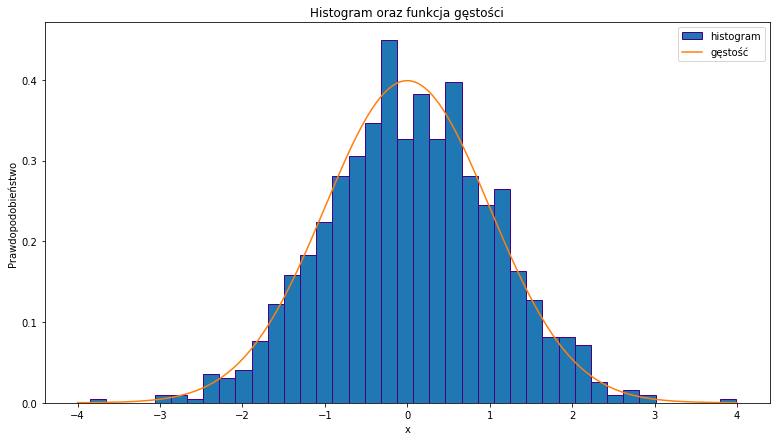

In [33]:
x = np.linspace(-4, 4, 10000)
f_x = np.exp((-x**2)/2)/np.sqrt(2*np.pi)

plt.figure(figsize=(13,7))
plt.hist(data, bins = 40, edgecolor = 'indigo', density = True, label='histogram')
plt.plot(x, f_x, label = 'gęstość')
plt.title('Histogram oraz funkcja gęstości')
plt.xlabel('x')
plt.ylabel('Prawdopodobieństwo')
plt.legend()

Wykres **dystrybuanty** empirycznej oraz teoretycznej:

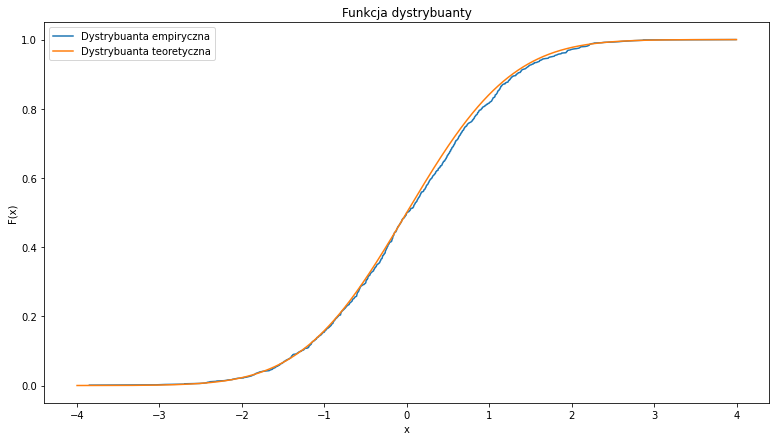

In [34]:
dystrybemp=ECDF(data)

plt.figure(figsize=(13,7))
plt.plot(dystrybemp.x, dystrybemp.y, label="Dystrybuanta empiryczna")
plt.plot(x, stats.norm.cdf(x, loc = mu, scale = sigma), label="Dystrybuanta teoretyczna")
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Funkcja dystrybuanty')
plt.legend()

**QQ-plot**

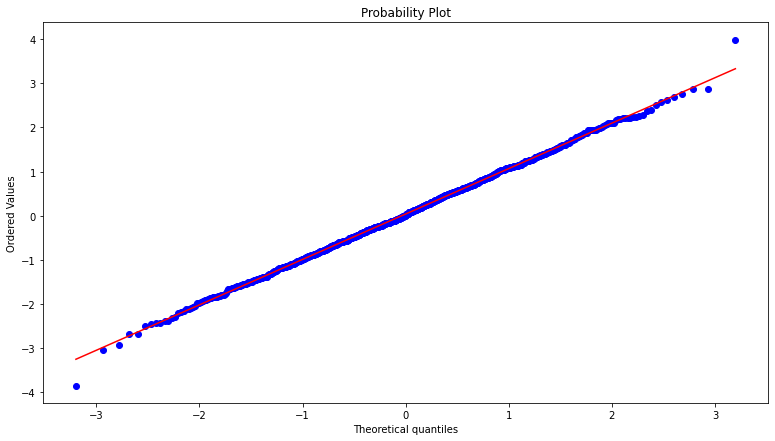

In [35]:
plt.figure(figsize=(13,7))
stats.probplot(data, dist=stats.norm(0,1), plot=plt)
plt.show()

**Seaborn plot:**

<AxesSubplot:>

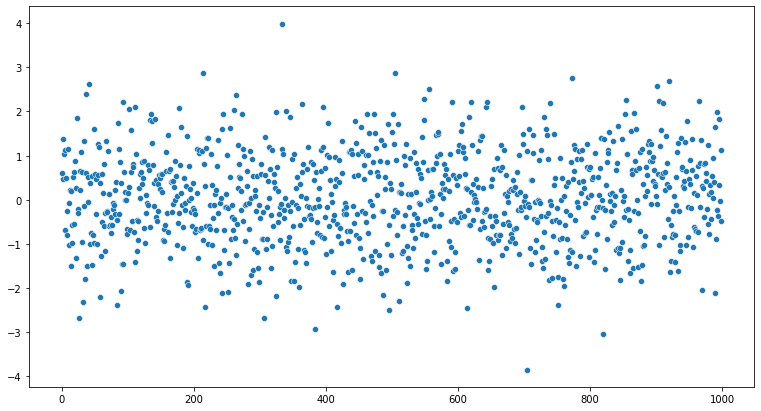

In [36]:
import seaborn as sns
plt.figure(figsize=(13,7))
sns.scatterplot(data)

### Metoda biegunowa

Metoda biegunowa polega na generowaniu par liczb losowych we współrzędnych biegunowych i przekształcaniu ich w niezależne liczby losowe o rozkładzie normalnym. 

Niech $(V_1, V_2)$ będzie vektorem losowym o rozkładzie jednostajnym w kole jednostkowym. Czyli gęstość $(V_1, V_2)$ wynosi: $$f(v_1, v_2) = \cfrac{1}{\pi}, \quad v_1^2 + v_2^2 \le 1$$

Podstawiamy do metody Boxa-Mulera $R^2\rightarrow U_1, \, \Theta\rightarrow U_2 \cdot 2\pi, \, \text{gdzie} \,R^2\perp\Theta, \, \Theta\sim\mathbb{U}(0,2\pi), \, R\sim\mathbb{U}(0,1)$

Wtedy otrzymujemy: $$X = \sqrt{-2\cfrac{log{R^2}}{R^2}}\,V_1$$ oraz $$Y = \sqrt{-2\cfrac{log{R^2}}{R^2}}\,V_2$$

Wówczas zmienne losowe $X, Y$ są niezależne i o rozkładzie normalnym z odchyleniem standardowym $\sigma = 1$.

#### *Algorytm generowania rozkłada normalnego metodą Boxa-Mullera:*
1. Generuj $V_1 \perp V_2$, $V_i \sim \mathbb{U}(-1,1)$.
2. Wyznacz $R^2 = V_1^2 + V_2^2$
3. Jeśli $R^2 > 1$ wróć do 1.
4. Wstaw $X = \sqrt{-2\cfrac{log{R^2}}{R^2}}\,V_1\quad$ oraz $\quad Y = \sqrt{-2\cfrac{log{R^2}}{R^2}}\,V_2$

#### *Implementacja:* 

In [37]:
def Biegun():

    licznik = 0
    while licznik<1:
        V1 = np.random.uniform(-1, 1)
        V2 = np.random.uniform(-1, 1)
        R = V1**2 + V2**2
        if R <= 1:
            licznik = 1
            X_0 = np.sqrt(-2*math.log(R)/R)*V1
        else:
            licznik = 0
            
    return X_0

def Normal_Biegun(mu, sigma):
    X_0 = Biegun()
    X = mu + sigma*X_0
    return X

Jak i w poprzedniej metodzie rozważamy **rozkład normalny standardowy**, z parametrami $\mu = 0, \, \sigma = 1$:

In [58]:
mu = 0
sigma = 1

data = []
n = 1000

for i in range (0, n):
    data.append(Normal_Biegun(mu, sigma))

Prztestujemy otrzymany generator.

Najpierw porównujemy teoretyczne **wartość oczekiwaną** $EX = \mu = 0$, **warjancję** $D^2X = \sigma^2 = 1$, **kurtozę** $Kurt = 0$ oraz **skosność** $A = 0$ z empirycznymi wartościami:

In [39]:
EX = np.mean(data)
VarX = np.var(data, ddof=1)
Kurt = stats.kurtosis(data)
A = stats.skew(data)

teoretyczna_EX = 0
teoretyczna_VarX = 1
teoretyczna_Kurt = 0
teoretyczna_A = 0

print ("EX =", EX, "; teoretyczna EX =", teoretyczna_EX)
print ("VarX =", VarX, "; teoretyczna VarX =", teoretyczna_VarX)
print ("Kurt =", Kurt, "; teoretyczna kurtoza = ", teoretyczna_Kurt)
print ("A =", A, "; teoretyczna skosność =", teoretyczna_A)

EX = 0.0009431364864851197 ; teoretyczna EX = 0
VarX = 1.016496043280314 ; teoretyczna VarX = 1
Kurt = -0.058059790359174634 ; teoretyczna kurtoza =  0
A = 0.1034747805114447 ; teoretyczna skosność = 0


Narysujemy **histogaram** generatora oraz **gęstość** $f_{0,1}(x) = \cfrac{1}{\sqrt{2\pi}} \exp\biggl(-\cfrac{x^2}{2}\biggr)$:

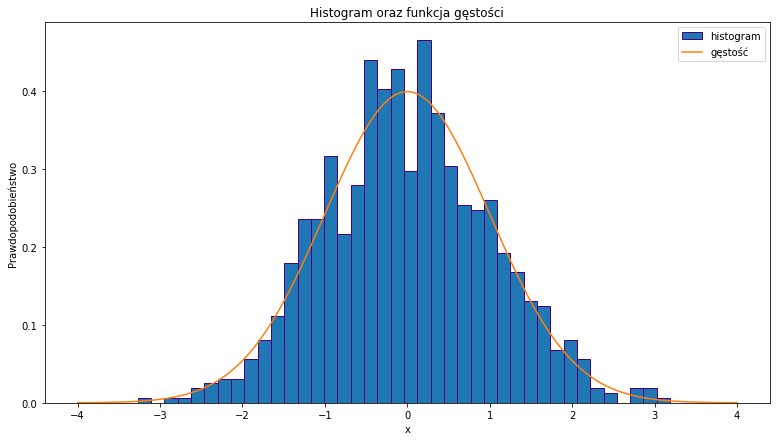

In [40]:
x = np.linspace(-4, 4, 10000)
f_x = np.exp((-x**2)/2)/np.sqrt(2*np.pi)

plt.figure(figsize=(13,7))
plt.hist(data, bins = 40, edgecolor = 'indigo', density = True, label='histogram')
plt.plot(x, f_x, label = 'gęstość')
plt.title('Histogram oraz funkcja gęstości')
plt.xlabel('x')
plt.ylabel('Prawdopodobieństwo')
plt.legend()

Wykres **dystrybuanty** empirycznej oraz teoretycznej:

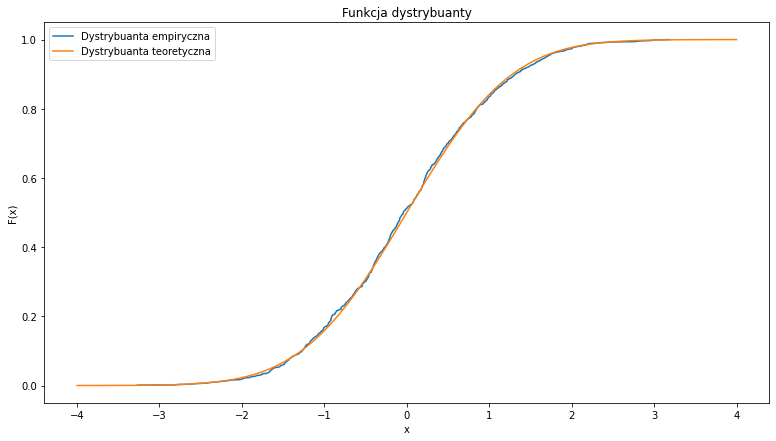

In [41]:
dystrybemp=ECDF(data)

plt.figure(figsize=(13,7))
plt.plot(dystrybemp.x, dystrybemp.y, label="Dystrybuanta empiryczna")
plt.plot(x, stats.norm.cdf(x, loc = mu, scale = sigma), label="Dystrybuanta teoretyczna")
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Funkcja dystrybuanty')
plt.legend()

**QQ-plot:**

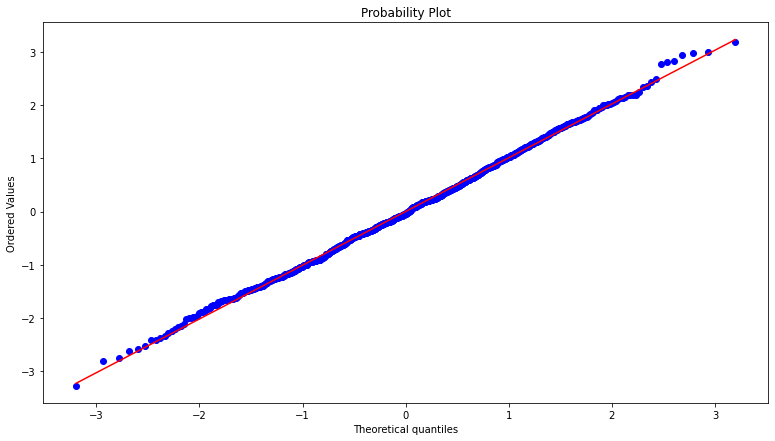

In [42]:
plt.figure(figsize=(13,7))
stats.probplot(data, dist=stats.norm(0,1), plot=plt)
plt.show()

**Seaborn plot:**


<AxesSubplot:>

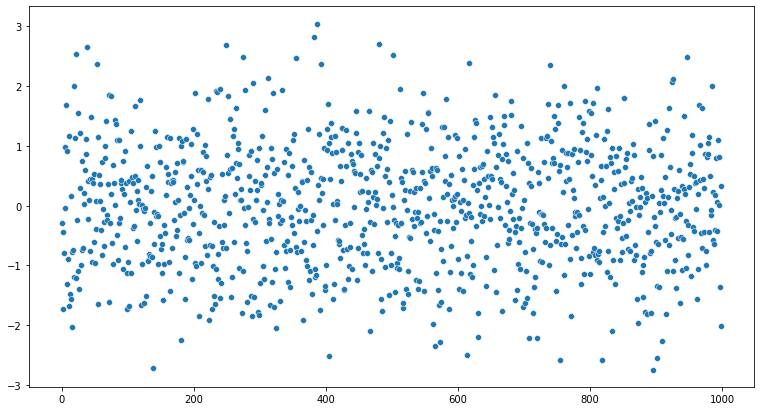

In [59]:
plt.figure(figsize=(13,7))
sns.scatterplot(data)

### Metoda akceptacji-odrzucenia przy użyciu rozkładu wykładniczego

Metoda akceptacji-odrzucenia wykorzystująca rozkład wykładniczy polega na wykorzystaniu rozkładu wykładniczego jako rozkładu propozycji, a następnie zaakceptowaniu lub odrzuceniu próbek na podstawie stosunku rozkładu docelowego do rozkładu wykładniczego.

#### *Definicja*

> Zmienna losowa $X$ ma **rozkład wykładniczy** $\mathbb{Exp}(\lambda)$, jeżeli jej funkcja gęstości prawdopodobieństwa $f_X(x)$ wyrażona jest wzorem: $$f_X(x) = \lambda e^{-\lambda x},\; \text{dla}\, x > 0$$ 

Rozkład wykładniczy jest oparty na jednym parametrze - średnią ilością czasu między zdarzeniami $\lambda$.

Funkcja dystrybuanty dla rozkładu wykładniczego jest następująca: $$F_X(x) = 1 - e^{-\lambda x}$$

#### *Algorytm generowania rozkłada normalnego metodą akceptacji-odrzucenia(punkt 3) przy użyciu rozkładu wykładniczego:*
1. Wyznacz $c = \sup{\cfrac{f(x)}{g(x)}}$, gdzie $f(x)$ - gęstość rozkładu normalnego, a $g(x)$ - gęstość rozkładu wykładniczego.
2. Generuj $Y\sim\mathbb{Exp}(1)$  
3. Generuj $U\sim \mathbb{U}(0,1), \; U\perp Y$
4. Jeśli $U \le \cfrac{f(Y)}{c\cdot g(Y)}$ zwróć $X=Y$. W przeciwnym razie wróć do 1


#### *Implementacja:* 
Najpierw zaimportujemy funkcję dla generowania rozkładu wykładniczego za pomocą metody odwrotnej dystrybuanty(punkt 2). Dystrybuanta odwrotna rozkładu wykładniczego wynosi: $$F_X^{-1}(x) = -\cfrac{\log{(1-x)}}{\lambda}\, .$$

In [44]:
def Exp(lamda):
    U = np.random.uniform(0,1)
    X = -np.log(1-U)/lamda
    return X

Teraz korzystamy z algorytmu:

In [45]:
def Normal_AO(mu, sigma, n):
    X = []
    x = np.arange(0, 1000, 0.1)
    c = np.max(np.exp(-(((x-mu)**2)/2*sigma**2)+x)/(sigma*np.sqrt(2*np.pi)))
    while len(X) < n:
        Y = Exp(1)
        U = np.random.uniform(0,1)
        if U <= np.exp(-(((Y-mu)**2)/2*sigma**2)+Y)/(c*sigma*np.sqrt(2*np.pi)):
            X.append(Y*np.random.choice([-1,1]))
    return X

Jak i w poprzednich metodach rozważamy **rozkład normalny standardowy**, z parametrami $\mu = 0, \, \sigma = 1$:

In [46]:
mu = 0
sigma = 1
n = 1000
data = Normal_AO(mu, sigma, n)

Prztestujemy otrzymany generator.

Najpierw porównujemy teoretyczne **wartość oczekiwaną** $EX = \mu = 0$, **warjancję** $D^2X = \sigma^2 = 1$, **kurtozę** $Kurt = 0$ oraz **skosność** $A = 0$ z empirycznymi wartościami:

In [47]:
EX = np.mean(data)
VarX = np.var(data, ddof=1)
Kurt = stats.kurtosis(data)
A = stats.skew(data)

teoretyczna_EX = 0
teoretyczna_VarX = 1
teoretyczna_Kurt = 0
teoretyczna_A = 0

print ("EX =", EX, "; teoretyczna EX =", teoretyczna_EX)
print ("VarX =", VarX, "; teoretyczna VarX =", teoretyczna_VarX)
print ("Kurt =", Kurt, "; teoretyczna kurtoza = ", teoretyczna_Kurt)
print ("A =", A, "; teoretyczna skosność =", teoretyczna_A)

EX = 0.0099330081804428 ; teoretyczna EX = 0
VarX = 1.0140735411910364 ; teoretyczna VarX = 1
Kurt = -0.24538295659893672 ; teoretyczna kurtoza =  0
A = -0.07955870491593275 ; teoretyczna skosność = 0


Narysujemy **histogaram** generatora oraz **gęstość** $f_{0,1}(x) = \cfrac{1}{\sqrt{2\pi}} \exp\biggl(-\cfrac{x^2}{2}\biggr)$:

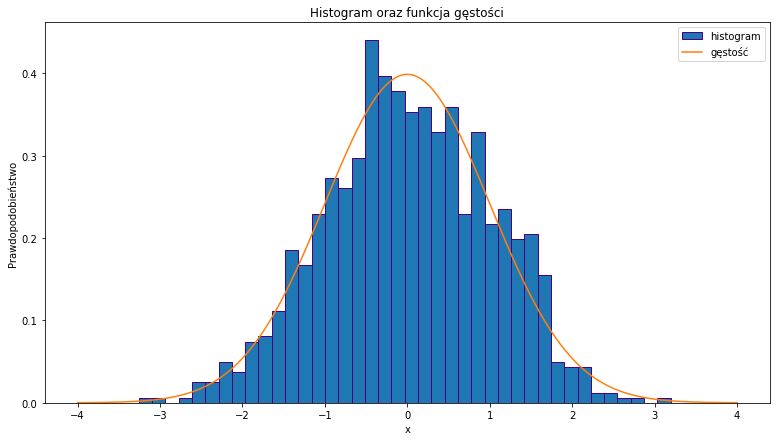

In [48]:
x = np.linspace(-4, 4, 10000)
f_x = np.exp((-x**2)/2)/np.sqrt(2*np.pi)

plt.figure(figsize=(13,7))
plt.hist(data, bins = 40, edgecolor = 'indigo', density = True, label='histogram')
plt.plot(x, f_x, label = 'gęstość')
plt.title('Histogram oraz funkcja gęstości')
plt.xlabel('x')
plt.ylabel('Prawdopodobieństwo')
plt.legend()

Wykres **dystrybuanty** empirycznej oraz teoretycznej:

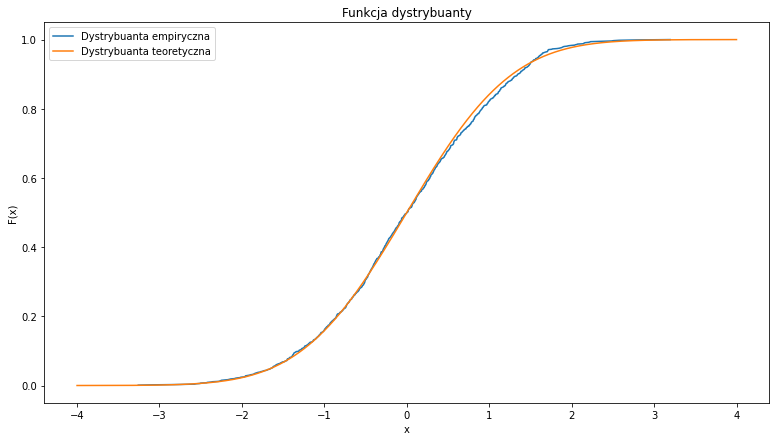

In [49]:
dystrybemp=ECDF(data)

plt.figure(figsize=(13,7))
plt.plot(dystrybemp.x, dystrybemp.y, label="Dystrybuanta empiryczna")
plt.plot(x, stats.norm.cdf(x, loc = mu, scale = sigma), label="Dystrybuanta teoretyczna")
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Funkcja dystrybuanty')
plt.legend()

**QQ-plot**

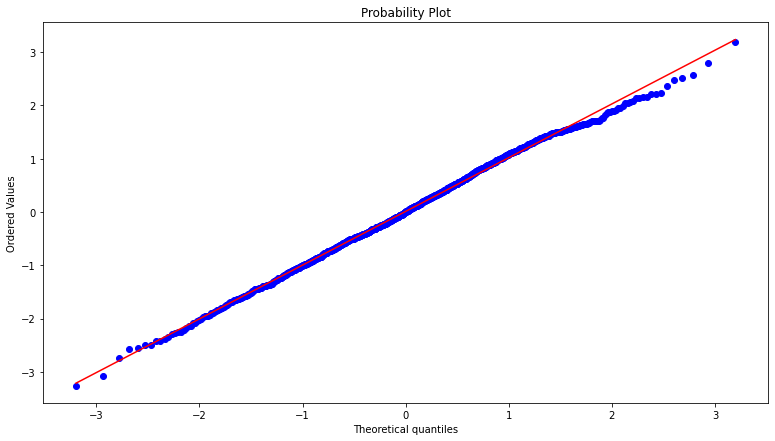

In [50]:
plt.figure(figsize=(13,7))
stats.probplot(data, dist=stats.norm(0,1), plot=plt)
plt.show()

##### *Wnioski:*

W ogóle możemy powiedzieć, że metoda Boxa-Mullera, metoda biegunowa i metoda akceptecji-odrzucenia były skutecznymi metodami generowania próbek z rozkładu normalnego. Patrząc na testy można stwierdzić, że wszystkie metody so poprawnie zaimplementowane, chociaż w niektórzych przypadkach była rozbieżność wartości teoretycznych i empirycznych. To może być spowodowane niezaprzeczonej losowości generowania liczb losowych. Ale żeby ustalić jaka metoda generowania rozkładu normalnego jest najbardziej wydajna narysujemy wykres ze względu na czas działania każdej metody w zależności od długości wysymulowanej próbki.

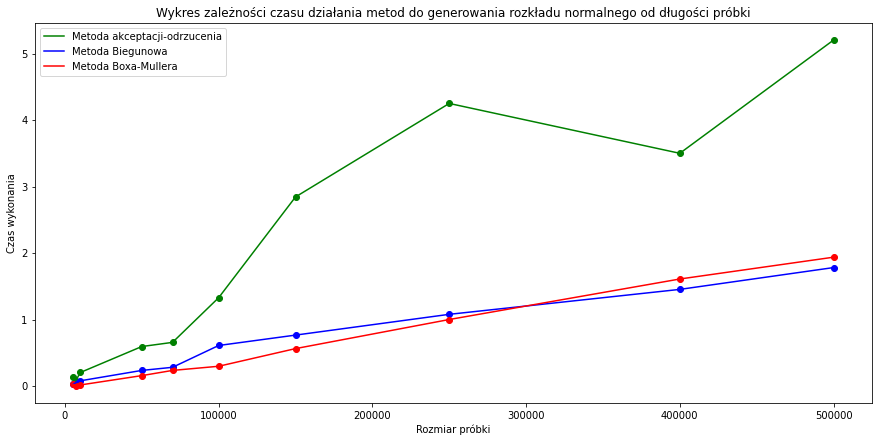

In [51]:
import time 

mu = 0
sigma = 1
n = [5000, 7000, 10000, 50000, 70000, 100000, 150000, 250000, 400000, 500000] 

def wykres_BM():
    czas = []
    for i in range (0,len(n)):
        t = time.process_time() 
        for i in range (0,n[i]):
            Normal_BM(mu,sigma)
        t = time.process_time() - t
        czas.append(t)
    x, y = n, czas
    plt.scatter(x,y,color = 'red')
    plt.plot(x,y, color = 'red', label="Metoda Boxa-Mullera") 

def wykres_Biegun():
    czas = []
    for i in range (0,len(n)):
        t = time.process_time() 
        for i in range (0,n[i]):
            Normal_Biegun(mu,sigma)
        t = time.process_time() - t
        czas.append(t)
    x, y = n, czas
    plt.scatter(x,y,color = 'blue')
    plt.plot(x,y, color = 'blue', label="Metoda Biegunowa") 


def wykres_AO():
    czas = []
    for i in range (0,len(n)):
        t = time.process_time() 
        Normal_AO(mu,sigma,n[i])
        t = time.process_time() - t
        czas.append(t)
    x, y = n, czas
    plt.scatter(x,y,color = 'green')
    plt.plot(x,y, color = 'green', label="Metoda akceptacji-odrzucenia") 
    
plt.figure(figsize=(15,7))
wykres_AO()
wykres_Biegun()
wykres_BM()
plt.xlabel("Rozmiar próbki")
plt.ylabel("Czas wykonania")
plt.legend()
plt.title("Wykres zależności czasu działania metod do generowania rozkładu normalnego od długości próbki")
plt.show()

Z powyżrzego wykresu możemy jasne zobaczyć że metoda akceptacji odrzuzenia z pomocniczym rozkładem wykładniczym jest najbardziej wydajna dla generowania rozkładu normalnego. Czego nie można powiedzieć o metodzie Boxa-Mullera oraz metodzie biegunowej, bo przy wygenerowaniu tego wykresu wiele raz oni są w pobliżu siebie, więc nie można z pewnością stwierdzić ktora metoda jest wydajniejsza.

---

## 5. Algorytm Ziggurat

Algorytm Ziggurata to szybka i wydajna metoda generowania liczb losowych ze standardowego rozkładu normalnego. Polega ona na podziale rozkładu na serię „warstw” i użyciu mieszaniny rozkładów wykładniczych i normalnych do pobierania próbek z każdej warstwy. Ta metoda jest szczególnie przydatna do szybkiego generowania dużej liczby liczb losowych i jest powszechnie stosowana w symulacjach i innych zastosowaniach.

#### *Algorytm:*

1. Generuj $U_1 \sim\mathbb{U}(0,1)$ i $U_2\sim\mathbb{U}(0,1)$, $U_1 \perp U_2$
2. Wstaw $X=\sqrt{-2\ln{U_1}}\cos{(2 \pi U_2)}\; \text{i} \; Y=\sqrt{-2\ln{U_1}}\sin{(2 \pi U_2)}$.

#### *Przykład:* Rozkład Pareto

Jeżeli $X \sim \mathbb{Par}(a,m)$, gdzie $a>0,\;m>0$, to dystrybyanta jest wyrażna wzorem: $$F(x)=1-\biggl(\cfrac{m}{x}\biggl)^a$$ oraz funkcja gęstości $$f(x)=\cfrac{am^a}{x^{a+1}}$$ oraz $$EX=\cfrac{am}{a-1}, \; D^{2}X=\frac{am^2}{(a-1)^{2}(a-2)}$$.

In [52]:

def F_function(x, a, mu):
    if x == 0:
        return 0
    f = a*(mu**a)/(x**(a+1))
    return f

def inv_F_function(x, a, mu):
    f = (((a*(mu**a))/x)**(1/(a+1)))
    return f

def ziggurat_algorithm(a, mu):
    while True:
        c = random.randint(0, 255)
        d = random.randint(0, 4294967296)

        # Punkt 2.
        v = 0.00492867323399

        x = [0] * 256
        x[255] = 3.6541528853610088
        for i in range(254):
            x[254-i] = inv_F_function((v/x[255-i]) + F_function(x[255-i], a, mu), a, mu)

        k = []
        w = []
        k.append(np.floor(2**32*x[254]*F_function(x[254], a, mu)/v))
        w.append((1/(2**32))*v/F_function(x[254], a, mu))
        for i in range(1, 256):
            k.append(np.floor(2**32*x[i-1]/x[i]))
            w.append(x[i]/(2**32))

        y = d*w[c]
        a = y/mu
        if d < k[c]:
            return a

        if c == 0:
            while c == 0:
                u_1 = random.random()
                u_2 = random.random()
                a = -(np.log(u_1))/x[255]
                y = -(np.log(u_2))
                if y+y > a*a:
                    return a + x[255]

        u = np.random.uniform(0, 1)
        if (u*(F_function(x[c-1], a, mu) - F_function(x[c], a, mu)) < F_function(a, a, mu) - F_function(x[c], a, mu)):
            return a

In [53]:
a = 5
m = 1
n = 1000
data = []
for i in range(n):
    data.append(ziggurat_algorithm(a, m))
    
print(data)

[1.1903095417859142, 0.3020812469104952, 0.5907423523511703, 0.4390827789816452, 1.0718977104908314, 1.014111185321555, 0.2991059250291355, 1.2528455028712568, 1.2779603153822148, 0.43912822615493413, 1.7793428718743407, 1.7850823225708314, 0.21835228112847774, 1.4445373263522576, 0.12390750913444423, 0.17743237397189437, 0.1950683636590766, 1.1320973771962972, 1.3254499312603945, 0.23599576237712466, 1.447465646235705, 1.333065897277729, 0.9176135125184844, 0.5224561588339892, 1.07947216618061, 1.3117693359697329, 1.0990233446949134, 1.5151365356024642, 1.17182429037228, 0.9395778463775558, 0.0946577231238886, 1.379074440392967, 1.0539196469647971, 1.604792995297458, 1.5713352147136688, 0.9824755929049427, 1.6056000855518007, 1.5273636775222648, 0.9489890935523019, 1.7849021866466612, 1.7111610052062507, 0.24303473449691715, 1.760239965049847, 0.8328876121032082, 1.2740529600586128, 0.08308544472812278, 0.885764114281421, 0.99033794399129, 1.0154420736415934, 0.11111705073343128, 0.63

Prztestujemy otrzymany generator.

Najpierw porównujemy teoretyczne **wartość oczekiwaną** oraz **warjancję** z empirycznymi wartościami:

In [54]:
EX = np.mean(data)
VarX = np.var(data, ddof=1)

teoretyczna_EX = (a*m)/(a-1)
teoretyczna_VarX = ((a*m**2)/((a-2)*(a-1)**2))

print ("EX =", EX, "; teoretyczna EX =", teoretyczna_EX)
print ("VarX =", VarX, "; teoretyczna VarX =", teoretyczna_VarX)

EX = 0.835804435271378 ; teoretyczna EX = 1.25
VarX = 0.2699591850832375 ; teoretyczna VarX = 0.10416666666666667


Narysujemy **histogaram** generatora oraz **gęstość**:

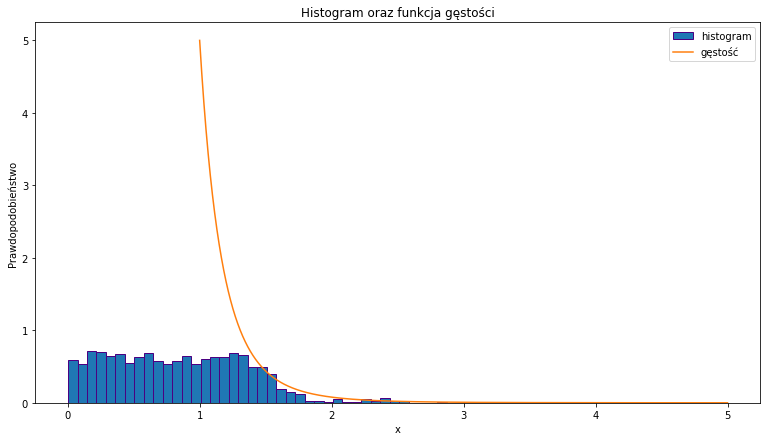

In [55]:
x = np.linspace(m, 5, 10000)
f_x = ((a*(m**a))/((x)**(a+1)))

plt.figure(figsize=(13,7))
plt.hist(data, bins = 40, edgecolor = 'indigo', density = True, label='histogram')
plt.plot(x, f_x, label = 'gęstość')
plt.title('Histogram oraz funkcja gęstości')
plt.xlabel('x')
plt.ylabel('Prawdopodobieństwo')
plt.legend()

Wykres **dystrybuanty** empirycznej oraz teoretycznej:

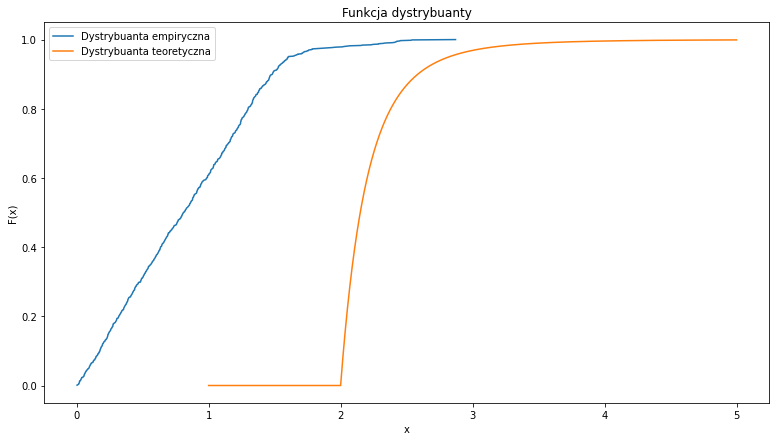

In [56]:
dystrybemp=ECDF(data)

plt.figure(figsize=(13,7))
plt.plot(dystrybemp.x, dystrybemp.y, label="Dystrybuanta empiryczna")
plt.plot(x, stats.pareto.cdf(x, a ,m), label="Dystrybuanta teoretyczna")
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Funkcja dystrybuanty')
plt.legend()

**QQ-plot:**

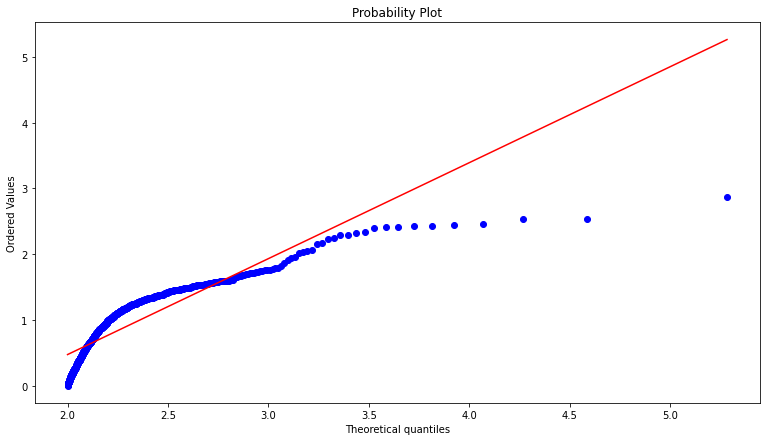

In [57]:
plt.figure(figsize=(13,7))
stats.probplot(data, dist=stats.pareto(a,m), plot=plt)
plt.show()

##### *Wnioski:*

Po wielkich próbach wygenerowania rozkładu Pareto metodą zigguratu okazało się, że kod nie działa poprawnie. Pomimo prób wprowadzenia modyfikacji w kodzie, nie byliśmy w stanie wygenerować tej metody poprawnej rozkładu Pareto. Po porównaniu teoretycznych i empirycznych wartości średniej i wariancji rozkładu, stało się jasne, że wygenerowany rozkład nie jest poprawny. Można zatem stwierdzić, że podany kod nie jest wiarygodną metodą generowania rozkładu Pareto. Konieczne są dalsze badania i modyfikacje w celu opracowania algorytmu zigguratu do generowania rozkładu Pareto.

---

## 5. Ułamkowy ruch Browna

##### *Definicja* 
> Ułamkowym ruchem Browna $B_H(t), \; t \neq 0,\; H \in (0, 1]$, nazywamy proces gaussowski o sredniej równej zero oraz funkcji autokowariancji $Cov(B_H(s),B_H(t)) = \cfrac{\sigma^2}{2} \;(t^{2H} + s^{2H} − |t − s|^{2H})$.

##### *Własnosci:*
1. $B_H(t)$ jest H-samopodobny
2. $B_H(t)$ ma stacjonarne przyrosty, zatem $B_H(t + h) − B_H(h) \stackrel{d}{=} B_H(t)$


*Ułamkowy szum gaussowski* - stacjonarny proces z dyskretnym czasem:
$$b_H(n) \stackrel{d}{=} B_H(n + 1) − B_H(n),\; n \in N_0$$
$b_H(n)$ - proces przyrostów ułamkowego ruchu Browna; proces gaussowski

$E(b_H(n)) = 0$

*Algorytm dla $\sigma^2 = 1$:*
1. $B_H = 0$
2. Wyznacz $\Gamma_N$:
$$\Gamma_N = 

\left(\begin{array}{cc} 
1 & \gamma(1) & \cdots & \gamma(N - 1)\\
\gamma(1) & 1 & \cdots & \gamma(N - 2)\\
\vdots & \vdots & \ddots & \vdots\\
\gamma(N - 1) & \gamma(N - 2) & \cdots & 1
\end{array}\right)
$$ 

gdzie $$\gamma(k) = EX_1X_{k+1} = \cfrac{1}{2}((k + 1)^{2H} + |k-1|^{2H} - 2k^{2H}), \; k \geq 0$$

3. Wyznacz $L$, jaka spełnia $\Gamma_N = LL^T$

4. $Z \sim \mathbb{N}(0,1)$

5. $X = LZ$

6. $B_H(t_i) = B_H(t_{i-1}) + (\cfrac{T}{N})^H X(t_i)$

Zaimplimentujemy algorytm:

In [ ]:
import numpy as np

def ruch_Browna(T, N, H):
    
    BH = np.zeros(N+1)
    
    Gamma = np.zeros((N, N))
    for i in range(N):
        for j in range(i, N):
            k = np.abs(i - j)
            gamma = 0.5 * ((k + 1) ** (2 * H) + np.abs(k - 1) ** (2 * H) - 2 * k ** (2 * H))
            Gamma[i, j] = gamma
            Gamma[j, i] = gamma
    
    L = np.linalg.cholesky(Gamma)
    
    Z = np.random.normal(0, 1, size=N)
    
    X = np.dot(L, Z)
    
    for i in range(1, N+1):
        BH[i] = BH[i-1] + (T / N) ** H * X[i-1]
    
    return BH

### a) Generowanie 100 trajektorii ułamkowego ruchu Browna z $H = 0.2 \; \text{i} \; H = 0.8$

- $\large H = 0.2$

In [ ]:
import matplotlib.pyplot as plt

T = 10
N = 100
H = 0.2
n = 100

t = np.linspace(0, T, N+1)
plt.figure(figsize=(13,7))

for i in range(0,n):
    trajectorja = ruch_Browna(T, N, H)
    plt.plot(t, trajectorja)
    
plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.title('Trajektoria ułamkowego ruchu Browna')
plt.grid(True)
plt.show()


**Linie kwantylowe** dla procesu $B_H(t)$ mają postać: $$q_p(t) = t^H q_p$$ gdzie $q_p$ to kwantyl
rzędu $p$ rozkładu $\mathbb{N}(0, \sigma^2)$.

In [ ]:
from scipy.stats import norm

plt.figure(figsize=(13,7))
t = np.linspace(0, T, N)
color = ['black', 'yellow', 'green', 'blue']

BH = []
t = np.linspace(0, T, N+1)
for i in range(0, n):
    bh = ruch_Browna(T, N, H)
    BH.append(bh)

p_p = [0.05, 0.3, 0.7, 0.95]

for p, c in zip(p_p, color):
    
    emp_kwantyl = np.quantile(BH, p, axis=0)
    plt.plot(t, emp_kwantyl, color = c, label = f'empiryczna linia kwantylowa rzędu {p}')

    teo_kwantyl = norm.ppf(p, loc = 0, scale = 1)
    plt.plot(t, (t**H)*teo_kwantyl, color = 'red')

plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Linie kwantylowe empiryczne oraz teoretyczne')
plt.legend()


- $\large H = 0.8$

In [ ]:
H = 0.8

plt.figure(figsize=(13,7))

for i in range(0,n):
    trajectorja = ruch_Browna(T, N, H)
    t = np.linspace(0, T, N+1)
    plt.plot(t, trajectorja)
    
plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.title('Trajektoria ułamkowego ruchu Browna')
plt.grid(True)
plt.show()

**Linie kwantylowe:**

In [ ]:
plt.figure(figsize=(13,7))

BH = []
t = np.linspace(0, T, N+1)
for i in range(0, n):
    bh = ruch_Browna(T, N, H)
    BH.append(bh)

p_p = [0.05, 0.3, 0.7, 0.95]

for p, c in zip(p_p, color):
    emp_kwantyl = np.quantile(BH, p, axis=0)
    plt.plot(t, emp_kwantyl, color = c, label = f'empiryczna linia kwantylowa rzędu {p}')

    #teoretyczne

    teo_kwantyl = norm.ppf(p, loc = 0, scale = 1)
    plt.plot(t, (t**H)*teo_kwantyl, color = 'red')

plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Linie kwantylowe empiryczne oraz teoretyczne')
plt.legend()

## 6. Wnioski

Podsumowując, istnieją różne metody generowania rozkładów dyskretnych i ciągłych, z których każda ma swoje mocne i słabe strony. 

- Metoda odwracania dystrybuanty jest prosta i intuicyjna, ale w przypadku złożonych rozkładów może być kosztowna obliczeniowo. 
- Metoda akceptacja-odrzucenie jest bardziej przydatna i może być stosowana w szerokim zakresie rozkładów, ale może być również kosztowna obliczeniowo i może wymagać dużej liczby próbek w celu uzyskania dokładnych wyników. 
- Metoda Boxa-Mullera i metoda biegunowa są skutecznymi metodami generowania rozkładów normalnych, ale mogą nie być odpowiednie dla wszystkich zastosowań. Obie metody są proste i wydajne, ale metoda biegunowa jest szybsza i dokładniejsza. Metoda akceptacja-odrzucenie wykorzystująca rozkład wykładniczy jest kolejnym podejściem do generowania rozkładów normalnych i może być przydatna do generowania skorelowanych zmiennych normalnych. 

Ogólnie, metody te zapewniają szereg opcji generowania liczb losowych z różnych rozkładów i mogą być wykorzystywane w szerokim zakresie zastosowań w statystyce, fizyce i inżynierii.

---